In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most forplot
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_excel("Book1.xlsx")

In [3]:
# displaying first 5 rows of the dataset
df.head() 

,id,trans_type,trans_ref,status,ppan,cts,bsb,account_no,indicator,trans_code,...,remitter_name,withhold_tax_amount,trans_data_id,stan,post_date,approval_code,hold_number,exchange_rate,ext_trans_no,error_msg
0,94201,Monthly fee (base),94200,SUCCESS,482003TZEDFE4612,2021-03-16,NaN,NaN,NaN,32S,...,NaN,NaN,93924,NaN,2021-06-04,0.0,NaN,1.0,NaN,NaN
1,85017,Monthly fee (base),85016,SUCCESS,482003BBGAVJ4273,2021-03-24,NaN,NaN,NaN,32S,...,NaN,NaN,84759,NaN,2021-05-20,0.0,NaN,1.0,NaN,NaN
2,63092,Purchase,63091,SUCCESS,482003EVIRMM9816,2021-03-31,NaN,NaN,NaN,205,...,NaN,NaN,62867,NaN,2021-04-08,428379.0,922671898.0,1.0,NaN,NaN
3,62415,Purchase,62414,SUCCESS,482003GBDCSP2795,2021-03-29,NaN,NaN,NaN,205,...,NaN,NaN,62190,NaN,2021-04-07,431134.0,922127300.0,1.0,NaN,NaN
4,62174,Monthly fee (base),62173,SUCCESS,482003EILBWY3559,2021-03-23,NaN,NaN,NaN,32S,...,NaN,NaN,61950,NaN,2021-04-06,0.0,NaN,1.0,NaN,NaN


In [4]:
df.shape

(8963, 26)

In [5]:
df.columns

Index(['id', 'trans_type', 'trans_ref', 'status', 'ppan', 'cts', 'bsb',
       'account_no', 'indicator', 'trans_code', 'currency', 'amount',
       'description', 'lodgement_ref', 'remitter_bsb', 'remitter_account_no',
       'remitter_name', 'withhold_tax_amount', 'trans_data_id', 'stan',
       'post_date', 'approval_code', 'hold_number', 'exchange_rate',
       'ext_trans_no', 'error_msg'],
      dtype='object')

In [6]:
df.describe()

,id,trans_ref,account_no,indicator,amount,remitter_account_no,withhold_tax_amount,trans_data_id,stan,approval_code,hold_number,exchange_rate,error_msg
count,8963.000000,8963.000000,1.232000e+03,0.0,8963.000000,1.171000e+03,1106.0,8963.000000,0.0,7731.000000,7.548000e+03,7731.000000,0.0
mean,56580.703671,56579.703671,8.096503e+08,NaN,171.966392,4.656705e+07,0.0,56366.849158,NaN,542252.716854,9.158836e+08,0.990428,NaN
std,2683.700466,2683.700466,2.800201e+08,NaN,532.380507,1.919821e+08,0.0,2675.133905,NaN,266582.112685,4.916390e+06,0.097373,NaN
min,51605.000000,51604.000000,1.858430e+06,NaN,0.010000,1.900000e+02,0.0,51410.000000,NaN,0.000000,9.048009e+08,0.000000,NaN
25%,54297.500000,54296.500000,6.519169e+08,NaN,13.325000,2.729700e+04,0.0,54093.500000,NaN,320580.000000,9.121022e+08,1.000000,NaN
50%,56580.000000,56579.000000,9.921102e+08,NaN,43.950000,4.880800e+04,0.0,56362.000000,NaN,544584.000000,9.167816e+08,1.000000,NaN
75%,58831.500000,58830.500000,9.961705e+08,NaN,109.915000,6.689100e+04,0.0,58611.500000,NaN,769673.500000,9.200462e+08,1.000000,NaN
max,94201.000000,94200.000000,9.999994e+08,NaN,9970.730000,8.381493e+08,0.0,93924.000000,NaN,999861.000000,9.230254e+08,1.000000,NaN


In [7]:
df['trans_type'].value_counts()

Purchase              7472
BatchTopupTrans       1106
Cash                    76
Payment                 74
Withdrawal              65
TopupCard               61
Credit purchase         59
Monthly fee (base)      49
Reverse cash             1
Name: trans_type, dtype: int64

Text(0.5, 1.0, 'Various types of transaction')

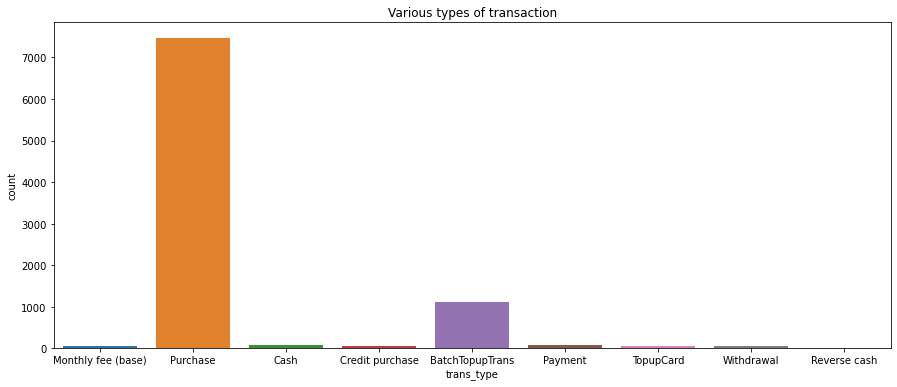

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(df['trans_type'])
plt.title("Various types of transaction")

In [9]:
 df['status'].value_counts()

SUCCESS    8963
Name: status, dtype: int64

In [10]:
 df['currency'].value_counts()

AUD    8844
USD     104
GBP      12
EUR       3
Name: currency, dtype: int64

Text(0.5, 1.0, 'Various types of currency')

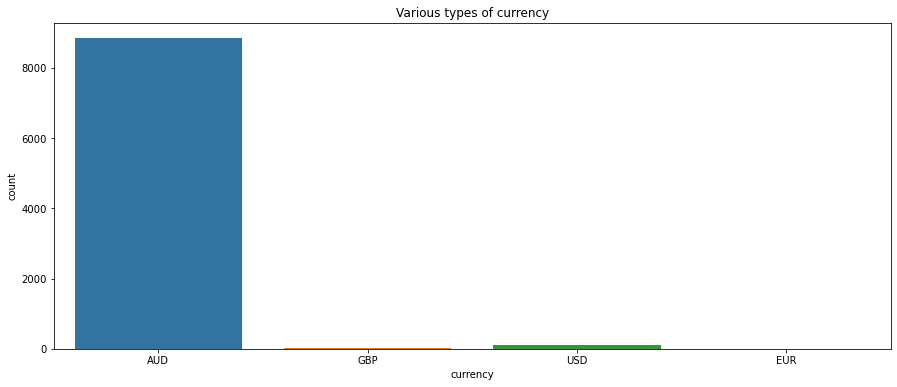

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df['currency'])
plt.title("Various types of currency")

In [12]:
df.drop_duplicates(keep=False,inplace=True)

In [13]:
df.shape

(8963, 26)

In [14]:
## checking if any null values exist in the data
df.isnull().sum()

id                        0
trans_type                0
trans_ref                 0
status                    0
ppan                      0
cts                       0
bsb                    7842
account_no             7731
indicator              8963
trans_code                0
currency                  0
amount                    0
description             160
lodgement_ref           143
remitter_bsb           7792
remitter_account_no    7792
remitter_name          7792
withhold_tax_amount    7857
trans_data_id             0
stan                   8963
post_date              1167
approval_code          1232
hold_number            1415
exchange_rate          1232
ext_trans_no           7731
error_msg              8963
dtype: int64

<AxesSubplot:>

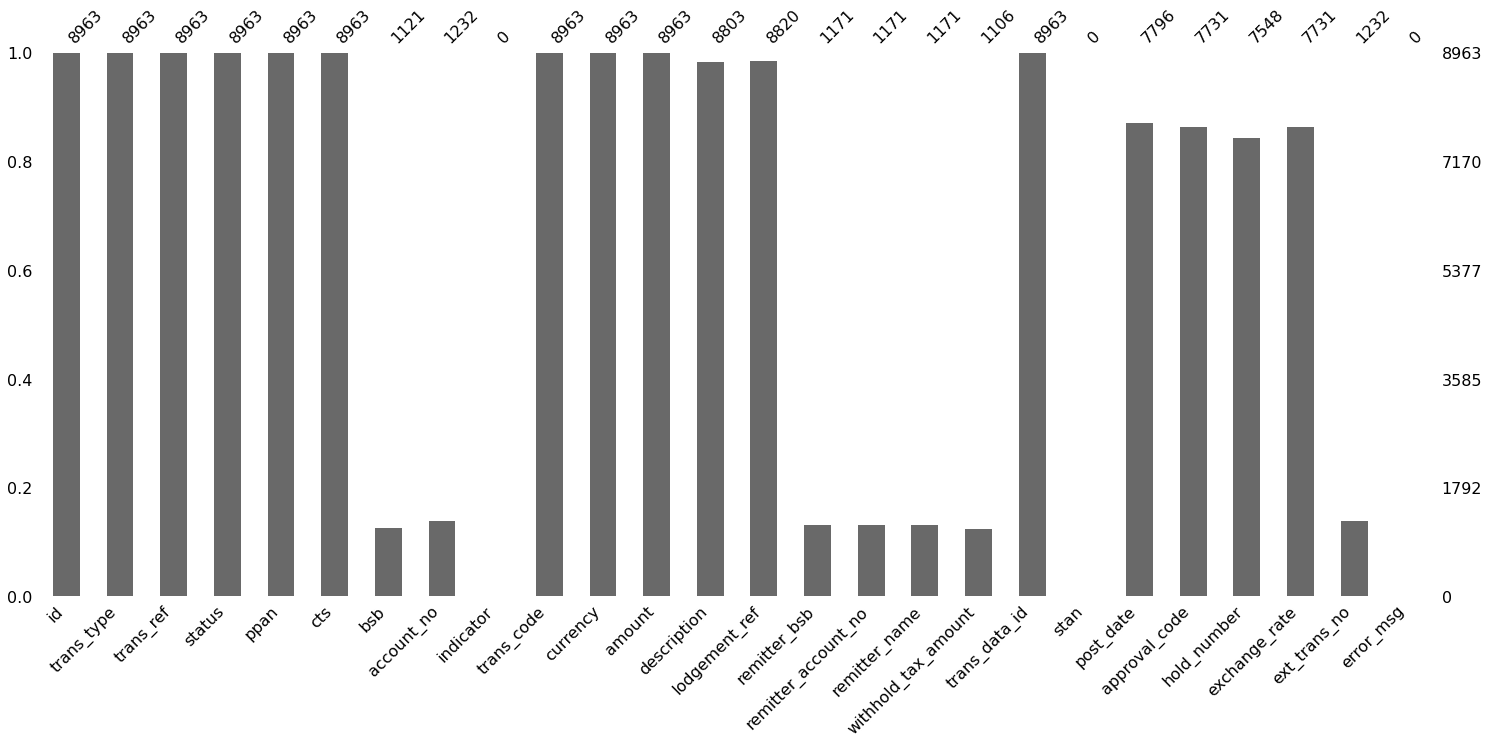

In [15]:
import missingno as msno

msno.bar(df)

In [16]:
df= df[['trans_type', 'trans_ref', 'status', 'ppan', 'cts', 'trans_code', 'currency', 'amount',
       'description', 'lodgement_ref', 'trans_data_id',
       'post_date', 'approval_code', 'hold_number', 'exchange_rate'
 
]]

In [17]:
df.head()

,trans_type,trans_ref,status,ppan,cts,trans_code,currency,amount,description,lodgement_ref,trans_data_id,post_date,approval_code,hold_number,exchange_rate
0,Monthly fee (base),94200,SUCCESS,482003TZEDFE4612,2021-03-16,32S,AUD,5.00,NaN,NaN,93924,2021-06-04,0.0,NaN,1.0
1,Monthly fee (base),85016,SUCCESS,482003BBGAVJ4273,2021-03-24,32S,AUD,5.00,NaN,NaN,84759,2021-05-20,0.0,NaN,1.0
2,Purchase,63091,SUCCESS,482003EVIRMM9816,2021-03-31,205,AUD,45.00,VIRGIN AUSTR0795151210280\BRISBANE \AU,74045381091919996649472.0,62867,2021-04-08,428379.0,922671898.0,1.0
3,Purchase,62414,SUCCESS,482003GBDCSP2795,2021-03-29,205,AUD,319.45,PAYPAL *PITNEYBOWES \4029357733 \AU,74585701096113100029952.0,62190,2021-04-07,431134.0,922127300.0,1.0
4,Monthly fee (base),62173,SUCCESS,482003EILBWY3559,2021-03-23,32S,AUD,5.00,NaN,NaN,61950,2021-04-06,0.0,NaN,1.0


In [18]:
df['currency'].value_counts()

AUD    8844
USD     104
GBP      12
EUR       3
Name: currency, dtype: int64

Text(0.5, 1.0, 'amount with respect to date')

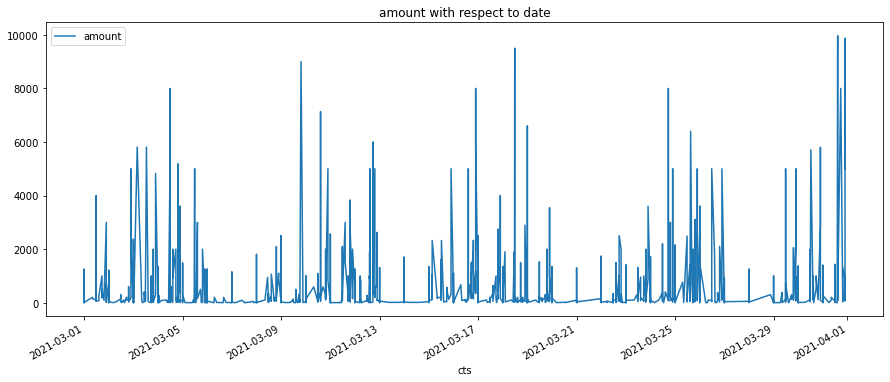

In [19]:
df.plot(x = 'cts', y = 'amount',figsize=(15, 6))
plt.title("amount with respect to date")

In [20]:
amount = df.groupby('trans_type')['amount'].sum()
amount = amount.sort_values(ascending=False)
transcation = amount[0:11].index

cases = amount[0:11].values 

total = df.groupby('trans_type')['amount'].sum()
dea= total[transcation].values # Number of Deaths in Top 10 Countries


cases_data = pd.DataFrame({'Transaction': transcation, 'Total amount': cases})
print(cases_data)

          Transaction  Total amount
0     BatchTopupTrans    793238.480
1            Purchase    658687.770
2                Cash     34781.500
3             Payment     20304.710
4          Withdrawal     17789.840
5     Credit purchase      8910.090
6           TopupCard      7174.882
7  Monthly fee (base)       245.000
8        Reverse cash       202.500


Text(0.5, 1.0, 'Types of transaction based on amount')

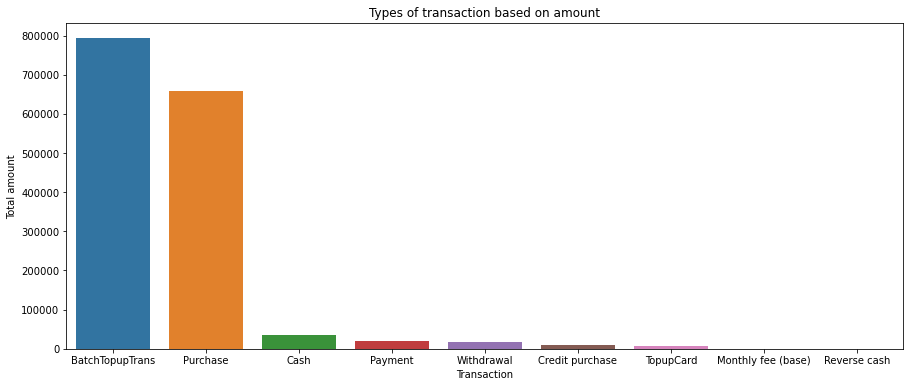

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x="Transaction", y="Total amount", data=cases_data)
plt.title("Types of transaction based on amount")

In [22]:
amount = df.groupby('currency')['amount'].sum()
amount = amount.sort_values(ascending=False)
currency = amount[0:11].index

cases = amount[0:11].values 

total = df.groupby('currency')['amount'].sum()
dea= total[currency].values # Number of Deaths in Top 10 Countries


cases_data = pd.DataFrame({'currency': currency, 'Total amount': cases})
print(cases_data)

  currency  Total amount
0      AUD   1524013.482
1      USD     15316.130
2      GBP      1757.420
3      EUR       247.740


Text(0.5, 1.0, 'Types of currency based on amount')

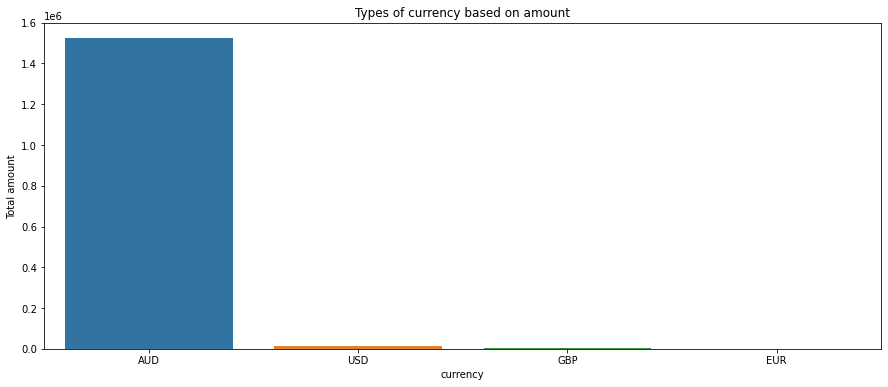

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x="currency", y="Total amount", data=cases_data)
plt.title("Types of currency based on amount")

In [24]:
df['trans_code'].value_counts()

205    7472
50     1102
207     141
12C      74
111      61
206      59
32S      49
53        4
227       1
Name: trans_code, dtype: int64

In [25]:
amount = df.groupby('trans_code')['amount'].sum()
amount = amount.sort_values(ascending=False)
trans_code = amount[0:11].index

cases = amount[0:11].values 

total = df.groupby('trans_code')['amount'].sum()
dea= total[trans_code].values # Number of Deaths in Top 10 Countries


cases_data = pd.DataFrame({'trans_code': trans_code, 'Total amount': cases})
print(cases_data)

  trans_code  Total amount
0         50    785598.480
1        205    658687.770
2        207     52571.340
3        12C     20304.710
4        206      8910.090
5         53      7640.000
6        111      7174.882
7        32S       245.000
8        227       202.500


Text(0.5, 1.0, 'Types of trans_code based on amount')

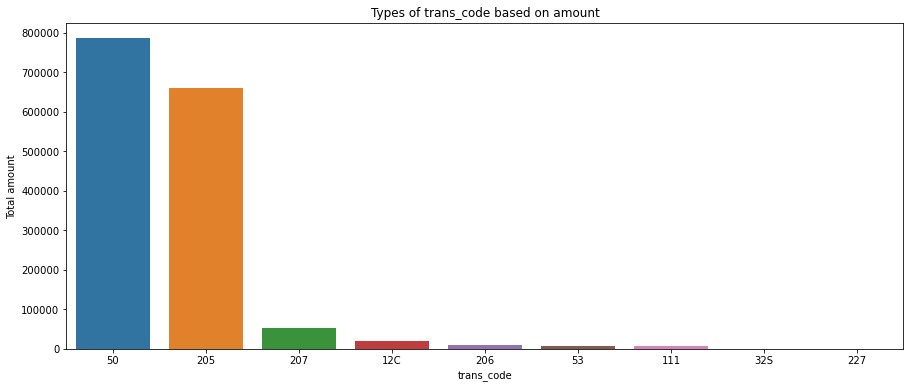

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x="trans_code", y="Total amount", data=cases_data)
plt.title("Types of trans_code based on amount")

Text(0.5, 1.0, 'Amount column Outiers')

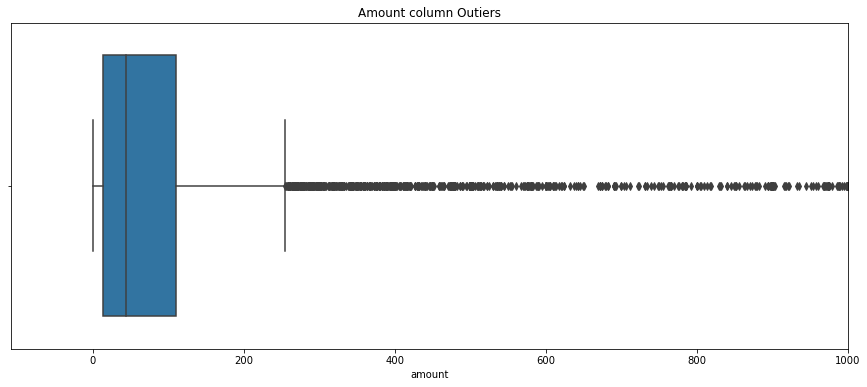

In [27]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='amount')
plt.xlim(-109,1000)

plt.ticklabel_format(style='plain', axis='x')
plt.title("Amount column Outiers")

Text(0.5, 1.0, 'Amount column Outiers with respect to type description')

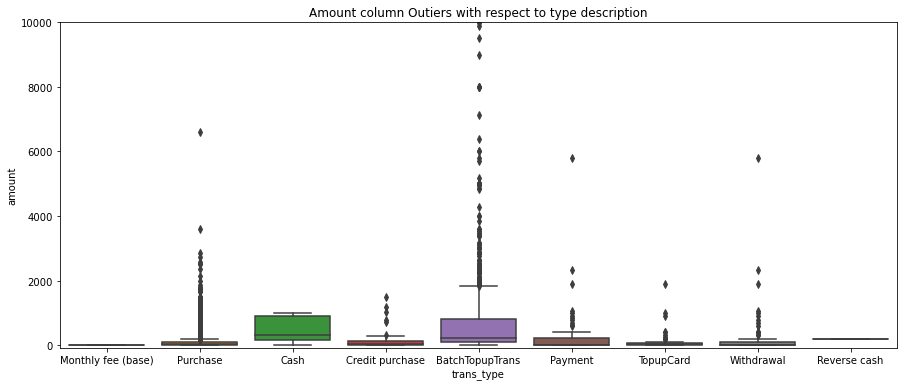

In [28]:
plt.figure(figsize=(15,6))

sns.boxplot(x=df["trans_type"], y="amount", data=df)
plt.ylim(-100,10000)
plt.title("Amount column Outiers with respect to type description")

Text(0.5, 1.0, 'Amount column Outiers with respect to currency')

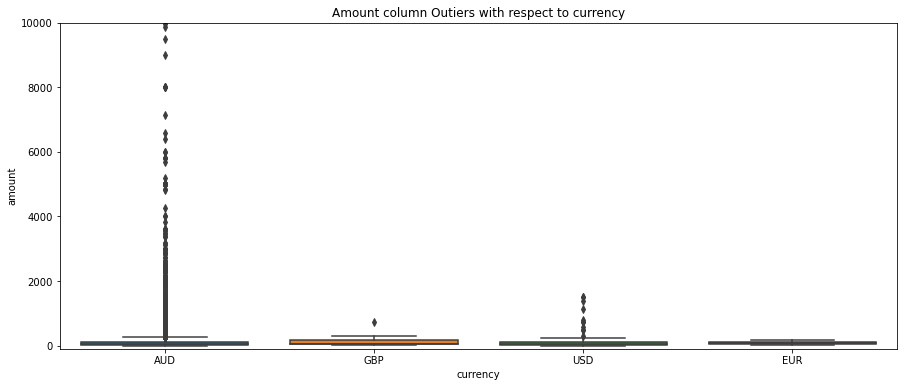

In [29]:
plt.figure(figsize=(15,6))

sns.boxplot(x=df["currency"], y="amount", data=df)
plt.ylim(-100,10000)
plt.title("Amount column Outiers with respect to currency")

In [30]:
# converting text lables to numbers
df['trans_type']=df['trans_type'].map({'Monthly fee (base)':9,'Purchase':1,'Cash':2,'Credit purchase':3,'BatchTopupTrans':4,'Payment':5,'TopupCard':6,'Withdrwal':7,'Reverse cash':8}) 

<AxesSubplot:>

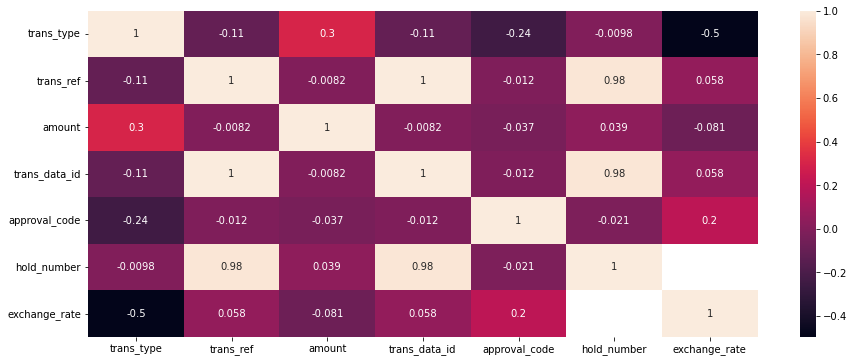

In [31]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True)

In [32]:
df.dropna(inplace=True)

In [33]:
df.shape

(7548, 15)

In [34]:
df.head()

,trans_type,trans_ref,status,ppan,cts,trans_code,currency,amount,description,lodgement_ref,trans_data_id,post_date,approval_code,hold_number,exchange_rate
2,1.0,63091,SUCCESS,482003EVIRMM9816,2021-03-31,205,AUD,45.00,VIRGIN AUSTR0795151210280\BRISBANE \AU,74045381091919996649472.0,62867,2021-04-08,428379.0,922671898.0,1.0
3,1.0,62414,SUCCESS,482003GBDCSP2795,2021-03-29,205,AUD,319.45,PAYPAL *PITNEYBOWES \4029357733 \AU,74585701096113100029952.0,62190,2021-04-07,431134.0,922127300.0,1.0
5,2.0,62165,SUCCESS,482003EKLFQK8816,2021-03-31,207,AUD,152.70,QUEANBEYAN SPORTS AND COM\QUEANBEYAN \AU,74934141091000803655680.0,61942,2021-04-06,926481.0,922728594.0,1.0
6,1.0,62130,SUCCESS,482003NMBZOE3630,2021-03-31,205,AUD,54.13,CALTEX STAR MART NAREL \NARELLAN \AU,74940521091806697357312.0,61907,2021-04-06,554582.0,922608272.0,1.0
7,1.0,62129,SUCCESS,482003BCFCPI8807,2021-03-31,205,AUD,268.73,CALTEX WYONG DIESEL SO \WYONG \AU,74940521091806697357312.0,61906,2021-04-06,816452.0,922558612.0,1.0


# Detection of outliers in the dataset

Text(0.5, 1.0, 'Amount column distribution')

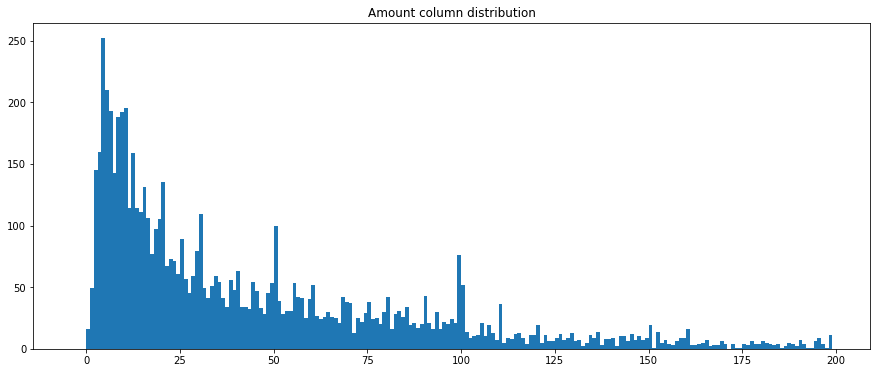

In [35]:
plt.figure(figsize=(15,6))

plt.hist(df['amount'], bins=range(-4, 200))
plt.ticklabel_format(style='plain')
plt.title("Amount column distribution")

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

trans_type       0.000000e+00
trans_ref        4.600500e+03
amount           7.513750e+01
trans_data_id    4.584500e+03
approval_code    4.452908e+05
hold_number      7.943970e+06
exchange_rate    0.000000e+00
dtype: float64


In [37]:
df= df.drop(['post_date','approval_code','hold_number','cts'], axis=1)

In [38]:
df.dtypes

trans_type       float64
trans_ref          int64
status            object
ppan              object
trans_code        object
currency          object
amount           float64
description       object
lodgement_ref     object
trans_data_id      int64
exchange_rate    float64
dtype: object

In [39]:
df.head()

,trans_type,trans_ref,status,ppan,trans_code,currency,amount,description,lodgement_ref,trans_data_id,exchange_rate
2,1.0,63091,SUCCESS,482003EVIRMM9816,205,AUD,45.00,VIRGIN AUSTR0795151210280\BRISBANE \AU,74045381091919996649472.0,62867,1.0
3,1.0,62414,SUCCESS,482003GBDCSP2795,205,AUD,319.45,PAYPAL *PITNEYBOWES \4029357733 \AU,74585701096113100029952.0,62190,1.0
5,2.0,62165,SUCCESS,482003EKLFQK8816,207,AUD,152.70,QUEANBEYAN SPORTS AND COM\QUEANBEYAN \AU,74934141091000803655680.0,61942,1.0
6,1.0,62130,SUCCESS,482003NMBZOE3630,205,AUD,54.13,CALTEX STAR MART NAREL \NARELLAN \AU,74940521091806697357312.0,61907,1.0
7,1.0,62129,SUCCESS,482003BCFCPI8807,205,AUD,268.73,CALTEX WYONG DIESEL SO \WYONG \AU,74940521091806697357312.0,61906,1.0


# Converting categorical into numerical

In [40]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [41]:
df.head()

,trans_type,trans_ref,status,ppan,trans_code,currency,amount,description,lodgement_ref,trans_data_id,exchange_rate
2,1.0,63091,0,165,0,0,45.00,3520,103,62867,1.0
3,1.0,62414,0,211,0,0,319.45,2566,1584,62190,1.0
5,2.0,62165,0,149,1,0,152.70,2743,1828,61942,1.0
6,1.0,62130,0,462,0,0,54.13,753,2130,61907,1.0
7,1.0,62129,0,30,0,0,268.73,774,2130,61906,1.0


In [42]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)
df_scaled_we = pd.DataFrame(df_scaled, columns=df.columns)

In [43]:
df_scaled_we.head()

,trans_type,trans_ref,status,ppan,trans_code,currency,amount,description,lodgement_ref,trans_data_id,exchange_rate
0,0.0,1.000000,0.0,0.175906,0.0,0.0,0.006819,0.896130,0.047796,1.000000,0.0
1,0.0,0.940723,0.0,0.224947,0.0,0.0,0.048418,0.653259,0.735035,0.940567,0.0
2,1.0,0.918921,0.0,0.158849,1.0,0.0,0.023144,0.698320,0.848260,0.918796,0.0
3,0.0,0.915857,0.0,0.492537,0.0,0.0,0.008203,0.191701,0.988399,0.915723,0.0
4,0.0,0.915769,0.0,0.031983,0.0,0.0,0.040731,0.197047,0.988399,0.915635,0.0


# K means with model sxplainable

In [44]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled_we)
    distortions.append(kmeanModel.inertia_)

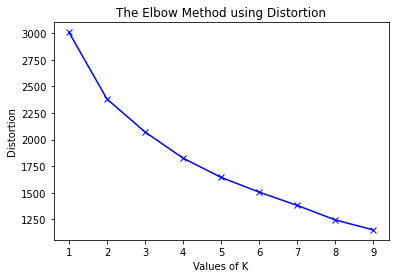

In [45]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
kmeanModel = KMeans(n_clusters=4)


In [47]:
y=kmeanModel.fit(df_scaled_we).labels_
y = label_binarize(y, classes=[0,1,2,3])
clf=RandomForestClassifier()
clf.fit(df,y)

RandomForestClassifier()

In [48]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(df).values

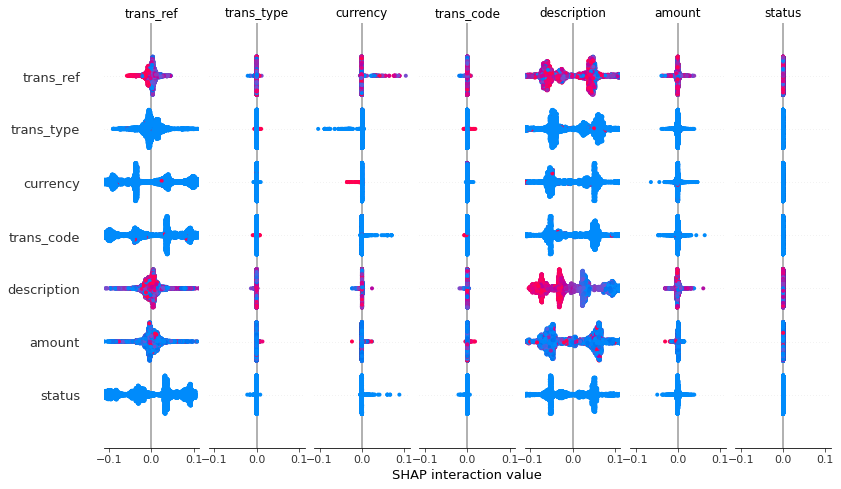

In [49]:
shap.summary_plot(shap_values, df,feature_names=df.columns)